## Análise de Dados do Titanic - Parte 4

### Introdução  
Esta etapa do projeto foca na **criação de uma nova funcionalidade**: o **Score de Sobrevivência**, uma métrica simples que avalia a chance de sobrevivência dos passageiros com base em características como sexo, classe social e idade. Além disso, exploramos visualmente essa métrica para melhor compreensão dos dados.

---

### 1. Importação dos Dados  
- Importar o dataset tratado (`dados_tratados.csv`) para o ambiente de análise.

### 2. Definição do Score de Sobrevivência  
- Criar uma função que atribui um score de 1 a 5 para cada passageiro com base em regras simples:
  - Mulheres da primeira classe: score 5
  - Mulheres da segunda classe: score 4
  - Mulheres da terceira classe: score 3
  - Homens com menos de 10 anos: score 3
  - Homens da primeira classe: score 2
  - Demais casos: score 1

### 3. Aplicação do Score no Dataset  
- Aplicar a função para criar uma nova coluna `Survival_Score` no DataFrame.

### 4. Visualização dos Scores  
- Criar gráficos para analisar a distribuição do score:
  - Gráfico de barras com a contagem de passageiros por score
  - Boxplot mostrando a distribuição da idade em cada grupo de score

**Dataset original:** [Titanic - Kaggle](https://www.kaggle.com/competitions/titanic)

*Autor: [Nayara C. Kakihara]*


In [1]:
import pandas as pd

#carregar o arquivo tratado
df = pd.read_csv('dados_tratados.csv')

#visualizar as primeiras linhas para confirmar a leitura
print(df.head())

#função para calcular o score de sobrevivência
def survival_score(row):
    if row['Sex'] == 'female' and row['Pclass'] == 1:
        return 5
    elif row['Sex'] == 'female' and row['Pclass'] == 2:
        return 4
    elif row['Sex'] == 'female' and row['Pclass'] == 3:
        return 3
    elif row['Sex'] == 'male' and row['Age'] < 10:
        return 3
    elif row['Sex'] == 'male' and row['Pclass'] == 1:
        return 2
    else:
        return 1

#aplicar o cálculo do score
df['Survival_Score'] = df.apply(survival_score, axis=1)

#mostrar as primeiras linhas com a nova coluna
print(df[['Sex', 'Pclass', 'Age', 'Survival_Score']].head(10))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
      Sex  Pclass        Age  Survival

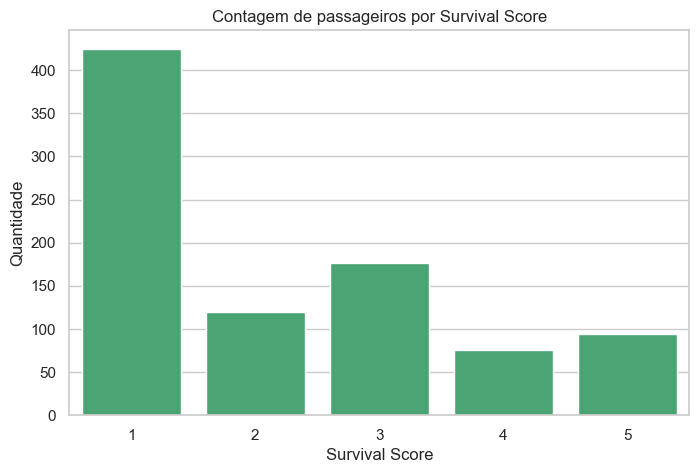

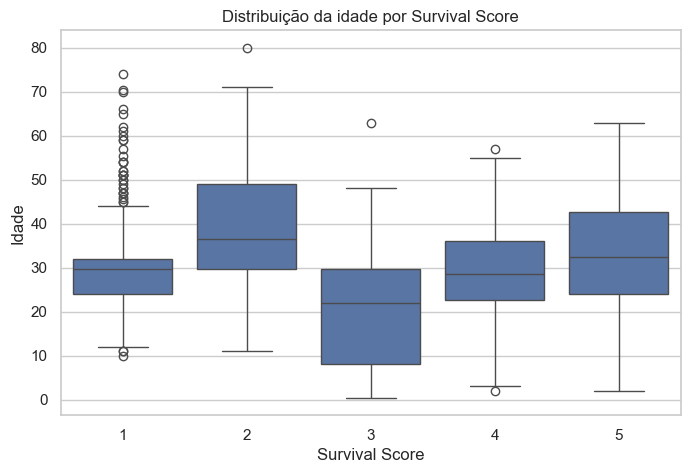

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#gráfico 1: Contagem de passageiros por Survival_Score
plt.figure(figsize=(8,5))
sns.countplot(x='Survival_Score', data=df, color='mediumseagreen')
plt.title('Contagem de passageiros por Survival Score')
plt.xlabel('Survival Score')
plt.ylabel('Quantidade')
plt.show()

#gráfico 2: Distribuição da idade por Survival_Score
plt.figure(figsize=(8,5))
sns.boxplot(x='Survival_Score', y='Age', data=df)
plt.title('Distribuição da idade por Survival Score')
plt.xlabel('Survival Score')
plt.ylabel('Idade')
plt.show()
